# SISTEMAS INTELIGENTES PARA CIENCIA DE DATOS
## Tercer Examen parical - Práctico
Alumnos:
- Israel Hernández García: E23S-18006
- Mitsiu Alejandro Carreño Sarabia: E23S-18014



# Introducción
El mundo de los videojuegos cada vez se acerca más a la realidad, con procesadores y arquitecturas más potentes ha permitido que distintos aspectos de los videojuegos como los gráficos y físicas sean cada vez más complejos y parecidos a la realidad, en este caso nos centraremos en el juego F1 2020 desarrollado por Codemasters, el cual simula, coches, equipos, circuitos del campeonato real de Formula 1 y permite al jugador correr las carreras, además de esto cuenta con capacidad para transmitir información del juego ([telemetría](https://es.wikipedia.org/wiki/Automovilismo_virtual#Telemetr%C3%ADa)) en tiempo real no estricto (soft real time), se vuelve una fuente de datos que se puede analizar como si fuera un evento del mundo real para tomar decisiones, que pueden llegar a ser la diferencia entre ganar o perder una carrera.


## Captura de datos
Como se mencionó, el videojuego F1 2020 permite transmitir información del videojuego a la red de área local mediante paquetes UDP. La metodología para la recolección de datos escapa el alcance de este trabajo pero se puede explorar el código usado para recibir y guardar los paquetes en formato csv en el siguiente [repositorio](https://github.com/mitsiu-carreno/Nyyyan2020_telemetry/tree/data_sc_demo).

Se guardan dos tipos de paquetes:
*   Información de vuelta (**Lap data packet**)
*   Información de telemetría del coche (**Car telemetry packet**)

Cabe resaltar que todos los paquetes comienzan con una cabecera (**header**) que contiene la siguiente información:

*   packetFormat:&emsp;&emsp;&emsp;Formato de información que contiene el paquete (2020)
*   gameMajorVersion:&emsp;Número de versión (1)
*   gameMinorVersion:&emsp;Decimales de versión (18)
*   packetVersion:&emsp;&emsp;&emsp;Versión del paquete (1)
*   packetId: &emsp;&emsp;&emsp;&emsp;&emsp; Identificador de paquete (tabla anexa)
*   sessionUID:&emsp;&emsp;&emsp;&emsp; Identificador de sesión en el videojuego
*   sessionTime: &emsp;&emsp;&emsp; Hora dentro de la sesión
*   frameIdentifier: &emsp;&emsp; Identificador de cuadro del que se extrajo la información
*   playerCarIndex: &emsp;&emsp; Índice del jugador (de los 20 coches corriendo en simulºtáneo)
*   secondaryPlayerCarIndex:&emsp;Índice del segundo jugador (si no existe se asigna 255)

**Identificadores de paquetes:**     

| Paquete             | Id | Descripción                                                |
|---------------------|----|------------------------------------------------------------|
| Movimiento          | 0  | Referente al movimiento del jugador cuando esta manejando  |
| Sesión              | 1  | Información de la sesión, pista y tiempo restante          |
| Vuelta              | 2  | Información de tiempo de vuelta de cada coche              |
| Evento              | 3  | Eventos notorios que ocurren durante la sesión             |
| Participantes       | 4  | Lista de participantes dentro de la sesión                 |
| Reglajes            | 5  | Información de los reglajes y puesta a punto de cada coche |
| Telemetría          | 6  | Telemetría de cada coche                                   |
| Estatus de coche    | 7  | Información de daños de todos los coches                   |
| Clasificación final | 8  | Resultados finales al terminar la sesión                   |
| Lobby               | 9  | Información de jugadores en el lobby                       |


### Contenido del paquete de vuelta (lap data):
*Nota: Todos los circuitos se dividen en tres partes denominadas sectores*

*   Paquete de cabecera (descrito anteriormente)
*   lastLapTime:&emsp;&emsp;&emsp;&emsp;Última vuelta en segundos
*   currentLapTime: &emsp;&emsp; Tiempo transcurrido en la vuelta actual en segundos
*   sector1TimeInMS: &emsp; Tiempo del sector 1 en segundos
*   sector2TimeInMS: &emsp; Tiempo del sector 2 en segundos
*   bestLapTime: &emsp;&emsp;&emsp; Mejor tiempo de vuelta de la sesión
*   bestLapNum: &emsp;&emsp;&emsp; Número de vuelta en que se obtuvo el mejor tiempo
*   bestLapSector1TimeInMS:&emsp;&emsp;Tiempo de sector 1 de la mejor vuelta (milisegundos)
*   bestLapSector2TimeInMS:&emsp;&emsp;Tiempo de sector 2 de la mejor vuelta (milisegundos)
*   bestLapSector3TimeInMS:&emsp;&emsp;Tiempo de sector 3 de la mejor vuelta (milisegundos)
*   bestOverallSector1TimeInMS:&emsp;Mejor tiempo del sector 1 de todas las vuelas (milisegundos)
*   bestOverallSector1LapNum: &emsp; Número de vuelta en que se obtuvo el mejor tiempo en el sector 1
*   bestOverallSector2TimeInMS:&emsp;Mejor tiempo del sector 2 de todas las vuelas (milisegundos)
*   bestOverallSector2LapNum: &emsp; Número de vuelta en que se obtuvo el mejor tiempo en el sector 2
*   bestOverallSector3TimeInMS:&emsp;Mejor tiempo del sector 3 de todas las vuelas (milisegundos)
*   bestOverallSector3LapNum: &emsp; Número de vuelta en que se obtuvo el mejor tiempo en el sector 3
*   lapDistance:&emsp;&emsp;&emsp;&emsp;Distancia de vuelta recorrida en la vuelta actual (metros), puede ser negativa si aun no se cruza la meta
*   totalDistance:&emsp;&emsp;&emsp; Distancia total recorrida en todas las vueltas (metros), puede ser negativa si aun no se cruza la meta
*   safetyCarDelta: &emsp;&emsp; Diferencia en segundos respecto al coche de seguridad (en caso de aparecer)
*   carPosition:&emsp;&emsp;&emsp;&emsp;Posición de carrera
*   currentLapNum:&emsp;&emsp;Número de vuelta actual
*   pitStatus:&emsp;&emsp;&emsp;&emsp;&emsp;0 = Ninguno, 1 = En pits, 2 = En área de pits
*   sector: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;0 = Sector 1, 1 = Sector 2, 2 = Sector 3
*   currentLapInvalid: &emsp;0 = valida, 1 = invalida
*   penalties:&emsp;&emsp;&emsp;&emsp;&emsp;Sumatoria de segundos acumulados de penalización
*   gridPosition: &emsp;&emsp;&emsp; Posición de arranque en carrera
*   driverStatus: &emsp;&emsp;&emsp;0 = en garage, 1 = en vuelta de clasificación, 2 = Regresando a pits, 3 = saliendo de pits, 4 = en pista
*   resultStatus: &emsp;&emsp;&emsp;0 = invalido, 1 = inactivo, 2 = activo, 3 = llego a meta, 4 = descalificado, 5 = no clasificado, 6 = retirado


### Contenido del paquete de telemetría del coche (car telemetry data):
*Nota: Los campos x4 se cuatriplican, para medir los cuatro neumaticos*

*   Paquete de cabecera (descrito anteriormente)
*   speed: &emsp;&emsp;&emsp; Velicidad del coche en kph
*   throttle:&emsp;&emsp;&emsp;Canitidad de aceledardor aplicado [0 - 1.0]
*   steer:&emsp;&emsp;&emsp;&emsp;Grado de giro del volante [-1.0 (Izquierda) - 1.0 (Derecha)]
*   brake: &emsp;&emsp; &emsp; Cantidad de freno aplicado [0 - 1.0]
*   clutch: &emsp;&emsp;&emsp; Cantidad de clutch aplicado [0 - 100]
*   gear:&emsp;&emsp;&emsp;&emsp; Número de marcha seleccionada [1-8, Neutral = 0, Reversa = -1]
*   engineRPM:&emsp;Cantidad de revoluciones por minuto del motor
*   drs: &emsp;&emsp;&emsp; &emsp; Estado del DRS, 0 = desactivado, 1 = activado
*   revLightsPercent: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Porcentaje del indicador de luces de revolución
*   brakesTemperature(x4): &emsp;&emsp;&emsp; Temperatura de frenos (celsius)
*   tyresSurfaceTemperature(x4):&emsp;Temperatura de la superficie del neumatico (celsius)
*   tyresInnerTemperature(x4): &emsp;&emsp;Temperatura interna del neumatico (celsius)
*   engineTemperature: &emsp;&emsp;&emsp;&emsp;&emsp; Temperatura del motor (celsius)
*   tyresPressure(x4):&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Presión del neumatico (PSI)
*   surfaceType(x4): &emsp; &emsp;&emsp;&emsp;&emsp;&emsp; Tipo de superficie (tabla anexa)



Las características técnicas completas se pueden consultar en la [documentación](https://web.archive.org/web/20221127112921/https://forums.codemasters.com/topic/50942-f1-2020-udp-specification/)

In [1]:
# Imporamos las librerías para manejo y transformación de la información
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lap_source = "lap.csv"
car_source = "car_telem.csv"
while(True):
  try:
    inp = int(input(f"¿Cargar datos de nube?: \n1=Datos de nube \n2=Datos locales (lap.csv & car_telem.csv)"))
    if inp == 1:
      print("Se cargaran los datos de la nube")
      lap_source = "https://drive.google.com/uc?id=16YWHNrsXdPvyyzuaf7IvMc7nKE529GIZ"
      car_source = "https://drive.google.com/uc?id=1_uuy073DRNs6T1WgS7zjpfsNEGecx9s2"
      break;
    if inp == 2:
      print("Carga los archivos lap.csv & car_telem.csv en el mismo directorio que este notebook")
      break;
    else:
      raise ValueError('Opcion incorrecta')
  except:
    print("valor incorrecto elija 1 para datos de nube o si tiene los archivos, cargados en el mismo directorio de este notebook y elija 2\n\n")

¿Cargar datos de nube?: 
1=Datos de nube 
2=Datos locales (lap.csv & car_telem.csv)1
Se cargaran los datos de la nube


In [3]:
# Cargamos el csv relacionado con los tiempos de vuelta
df_lap = pd.read_csv(lap_source)

df_lap


,packetFormat,gameMajorVersion,gameMinorVersion,packetVersion,packetId,sessionUID,sessionTime,frameIdentifier,playerCarIndex,secondaryPlayerCarIndex,...,safetyCarDelta,carPosition,currentLapNum,pitStatus,sector,currentLapInvalid,penalties,gridPosition,driverStatus,resultStatus
0,2020,1,18,1,2,6777929756610482444,0.019233,0,19,255,...,-0.0,10,1,0,2,0,0,10,4,2
1,2020,1,18,1,2,6777929756610482444,0.040277,1,19,255,...,-0.0,10,1,0,2,0,0,10,4,2
2,2020,1,18,1,2,6777929756610482444,0.072163,2,19,255,...,-0.0,10,1,0,2,0,0,10,4,2
3,2020,1,18,1,2,6777929756610482444,0.086520,3,19,255,...,-0.0,10,1,0,2,0,0,10,4,2
4,2020,1,18,1,2,6777929756610482444,0.116703,4,19,255,...,-0.0,10,1,0,2,0,0,10,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,2020,1,18,1,2,6777929756610482444,237.774536,9804,19,255,...,-0.0,5,3,0,2,0,0,10,4,2
9692,2020,1,18,1,2,6777929756610482444,237.791290,9805,19,255,...,-0.0,5,3,0,2,0,0,10,4,2
9693,2020,1,18,1,2,6777929756610482444,237.824585,9806,19,255,...,-0.0,5,3,0,2,0,0,10,4,2
9694,2020,1,18,1,2,6777929756610482444,237.841248,9807,19,255,...,-0.0,5,4,0,0,0,0,10,4,2


In [4]:
# Podemos explorar que tipo de dato tiene cada campo
df_lap.dtypes

packetFormat                    int64
gameMajorVersion                int64
gameMinorVersion                int64
packetVersion                   int64
packetId                        int64
sessionUID                      int64
sessionTime                   float64
frameIdentifier                 int64
playerCarIndex                  int64
secondaryPlayerCarIndex         int64
lastLapTime                   float64
currentLapTime                float64
sector1TimeInMS                 int64
sector2TimeInMS                 int64
bestLapTime                   float64
bestLapNum                      int64
bestLapSector1TimeInMS          int64
bestLapSector2TimeInMS          int64
bestLapSector3TimeInMS          int64
bestOverallSector1TimeInMS      int64
bestOverallSector1LapNum        int64
bestOverallSector2TimeInMS      int64
bestOverallSector2LapNum        int64
bestOverallSector3TimeInMS      int64
bestOverallSector3LapNum        int64
lapDistance                   float64
totalDistanc

In [5]:
# Cargamos el csv relacionado con la telemetría del coche

df_car_t = pd.read_csv(car_source)

df_car_t


,packetFormat,gameMajorVersion,gameMinorVersion,packetVersion,packetId,sessionUID,sessionTime,frameIdentifier,playerCarIndex,secondaryPlayerCarIndex,...,tyresInnerTempFrontR,engineTemperature,tyresPressureRearL,tyresPressureRearR,tyresPressureFrontL,tyresPressureFrontR,surfaceTypeRearL,surfaceTypeRearR,surfaceTypeFrontL,surfaceTypeFrontR
0,2020,1,18,1,6,6777929756610482444,0.019233,0,19,255,...,89,86,20.955711,20.955711,22.842724,22.842724,0,0,0,0
1,2020,1,18,1,6,6777929756610482444,0.040277,1,19,255,...,89,86,21.352974,21.352974,22.842722,22.842722,0,0,0,0
2,2020,1,18,1,6,6777929756610482444,0.072163,2,19,255,...,89,86,21.352970,21.352970,22.842718,22.842718,0,0,0,0
3,2020,1,18,1,6,6777929756610482444,0.086520,3,19,255,...,89,86,21.352970,21.352970,22.842718,22.842718,0,0,0,0
4,2020,1,18,1,6,6777929756610482444,0.116703,4,19,255,...,89,86,21.352966,21.352966,22.842712,22.842712,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,2020,1,18,1,6,6777929756610482444,237.774536,9804,19,255,...,95,122,21.570539,21.623917,23.045012,23.161282,0,0,0,0
9692,2020,1,18,1,6,6777929756610482444,237.791290,9805,19,255,...,95,122,21.570526,21.623905,23.044991,23.161268,0,0,0,0
9693,2020,1,18,1,6,6777929756610482444,237.824585,9806,19,255,...,95,122,21.570501,21.623888,23.044952,23.161240,0,0,0,0
9694,2020,1,18,1,6,6777929756610482444,237.841248,9807,19,255,...,95,122,21.570488,21.623880,23.044933,23.161226,0,0,0,0


In [6]:
# De igual manera podemos explorar los tipos de datos de cada campo
df_car_t.dtypes

packetFormat                 int64
gameMajorVersion             int64
gameMinorVersion             int64
packetVersion                int64
packetId                     int64
sessionUID                   int64
sessionTime                float64
frameIdentifier              int64
playerCarIndex               int64
secondaryPlayerCarIndex      int64
speed                        int64
throttle                   float64
steer                      float64
brake                      float64
clutch                       int64
gear                         int64
engineRPM                    int64
drs                          int64
revLightsPercent             int64
brakesTempRearL              int64
brakesTempRearR              int64
brakesTempFrontL             int64
brakesTempFrontR             int64
tyresSurfaceTempRearL        int64
tyresSurfaceTempRearR        int64
tyresSurfaceTempFrontL       int64
tyresSurfaceTempFrontR       int64
tyresInnerTempRearL          int64
tyresInnerTempRearR 

## Manejo de datos

Es importante expicar que aunque tenemos dos archivos csv, si analizamos los datos de la cabecera, específicamente “frameIdentifier” y "sessionTime", en realidad cada renglon del csv nos esta describiendo un aspecto distinto (ya sea información referente a la vuelta o información referente al coche) del mismo instante en el juego.

In [7]:
# Comprobemos el enunciado anterior
# Tomemos un renglon cualquiera de df_lap
print("Buscamos un instante aleatorio en el dataframe de las vueltas")
print(f'{df_lap[["sessionTime", "frameIdentifier", "sessionUID"]][50:51]}\n\n')

# Y buscamos en df_car_t un renglon que tenga el mismo sessionTime, frameIdentifier y sessionUID
print("Y lo buscamos en la información del coche")
df_car_t.query("sessionTime == " + str(df_lap.iloc[50]["sessionTime"]) + " & frameIdentifier == " + str(df_lap.iloc[50]["frameIdentifier"]) + " & sessionUID == " + str(df_lap.iloc[50]["sessionUID"]) )


Buscamos un instante aleatorio en el dataframe de las vueltas
    sessionTime  frameIdentifier           sessionUID
50      1.25132               50  6777929756610482444


Y lo buscamos en la información del coche


,packetFormat,gameMajorVersion,gameMinorVersion,packetVersion,packetId,sessionUID,sessionTime,frameIdentifier,playerCarIndex,secondaryPlayerCarIndex,...,tyresInnerTempFrontR,engineTemperature,tyresPressureRearL,tyresPressureRearR,tyresPressureFrontL,tyresPressureFrontR,surfaceTypeRearL,surfaceTypeRearR,surfaceTypeFrontL,surfaceTypeFrontR
50,2020,1,18,1,6,6777929756610482444,1.25132,50,19,255,...,89,86,21.352631,21.352631,22.842503,22.842503,0,0,0,0


Dado que ambos csv nos dan información distinta del mismo instante, podemos tomar como báse el frameIdentifier como si de un outer join se tratara en donde la tabla A es df_lap y la tabla B es df_car_t con una columa común "frameIdentifier" y usarlo para unir el resto de las columnas de cada uno de los csv


![full-outer-join](https://ubiq.co/database-blog/wp-content/uploads/2021/02/full-join-mysql.png "Full outer join")

In [8]:

df = df_lap.merge(df_car_t, on="frameIdentifier")

df


,packetFormat_x,gameMajorVersion_x,gameMinorVersion_x,packetVersion_x,packetId_x,sessionUID_x,sessionTime_x,frameIdentifier,playerCarIndex_x,secondaryPlayerCarIndex_x,...,tyresInnerTempFrontR,engineTemperature,tyresPressureRearL,tyresPressureRearR,tyresPressureFrontL,tyresPressureFrontR,surfaceTypeRearL,surfaceTypeRearR,surfaceTypeFrontL,surfaceTypeFrontR
0,2020,1,18,1,2,6777929756610482444,0.019233,0,19,255,...,89,86,20.955711,20.955711,22.842724,22.842724,0,0,0,0
1,2020,1,18,1,2,6777929756610482444,0.040277,1,19,255,...,89,86,21.352974,21.352974,22.842722,22.842722,0,0,0,0
2,2020,1,18,1,2,6777929756610482444,0.072163,2,19,255,...,89,86,21.352970,21.352970,22.842718,22.842718,0,0,0,0
3,2020,1,18,1,2,6777929756610482444,0.086520,3,19,255,...,89,86,21.352970,21.352970,22.842718,22.842718,0,0,0,0
4,2020,1,18,1,2,6777929756610482444,0.116703,4,19,255,...,89,86,21.352966,21.352966,22.842712,22.842712,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,2020,1,18,1,2,6777929756610482444,237.774536,9804,19,255,...,95,122,21.570539,21.623917,23.045012,23.161282,0,0,0,0
9692,2020,1,18,1,2,6777929756610482444,237.791290,9805,19,255,...,95,122,21.570526,21.623905,23.044991,23.161268,0,0,0,0
9693,2020,1,18,1,2,6777929756610482444,237.824585,9806,19,255,...,95,122,21.570501,21.623888,23.044952,23.161240,0,0,0,0
9694,2020,1,18,1,2,6777929756610482444,237.841248,9807,19,255,...,95,122,21.570488,21.623880,23.044933,23.161226,0,0,0,0


Podemos corroborar que nuestra union basados en frameIdentifier, mantiene una relación 1 a 1 con el sessionTime.     
Notese que como ambos dataframes tenían un campo sessionTime, pandas renombro a sessionTime_x (df_lap) y sessionTime_y(df_car_t) automaticamente para no perder información

In [9]:
if(df["sessionTime_x"].all() == df["sessionTime_y"].all()):
  print("Ambas columnas son iguales")


Ambas columnas son iguales


Finalmente podemos revisar cuáles columnas existen, y la cantidad de valores únicos que tiene cada una.

In [10]:
pd.set_option('display.max_rows', None)
print(df.nunique())


pd.reset_option('display.max_rows')

packetFormat_x                   1
gameMajorVersion_x               1
gameMinorVersion_x               1
packetVersion_x                  1
packetId_x                       1
sessionUID_x                     1
sessionTime_x                 9696
frameIdentifier               9696
playerCarIndex_x                 1
secondaryPlayerCarIndex_x        1
lastLapTime                      4
currentLapTime                9433
sector1TimeInMS                  4
sector2TimeInMS                  4
bestLapTime                      4
bestLapNum                       4
bestLapSector1TimeInMS           4
bestLapSector2TimeInMS           4
bestLapSector3TimeInMS           4
bestOverallSector1TimeInMS       3
bestOverallSector1LapNum         3
bestOverallSector2TimeInMS       4
bestOverallSector2LapNum         4
bestOverallSector3TimeInMS       2
bestOverallSector3LapNum         2
lapDistance                   9415
totalDistance                 9418
safetyCarDelta                   1
carPosition         

## Reducción de columnas
Podemos analizar cuales valores tienen las columnas con menos variabilidad (columnas cuya cantidad de valores únicos sea menor a 3)

In [11]:
print(pd.Series({col: df[col].unique() for col in df if df[col].nunique() < 2}))


packetFormat_x                              [2020]
gameMajorVersion_x                             [1]
gameMinorVersion_x                            [18]
packetVersion_x                                [1]
packetId_x                                     [2]
sessionUID_x                 [6777929756610482444]
playerCarIndex_x                              [19]
secondaryPlayerCarIndex_x                    [255]
safetyCarDelta                              [-0.0]
pitStatus                                      [0]
currentLapInvalid                              [0]
penalties                                      [0]
gridPosition                                  [10]
driverStatus                                   [4]
packetFormat_y                              [2020]
gameMajorVersion_y                             [1]
gameMinorVersion_y                            [18]
packetVersion_y                                [1]
packetId_y                                     [6]
sessionUID_y                 [6

Encontramos muchos los campos que dan datos generales sobre la versión del juego, el identificador de sesión, el indice del coche al que se refiere el paquete, o que por el desarrollo de la carrera no fueron necesarios, no hubo entrada a pits, ni hubo coche de seguridad, por lo que son datos que se mantienen durante toda la sesión, por ello, realmente no ofrecen información nueva.

In [12]:
# Generamos una nueva variable con únicamente las columnas que tengan dos o más valores distintos
df_interest = df.loc[:, (col for col in df if df[col].nunique()>=2)]
df_interest

,sessionTime_x,frameIdentifier,lastLapTime,currentLapTime,sector1TimeInMS,sector2TimeInMS,bestLapTime,bestLapNum,bestLapSector1TimeInMS,bestLapSector2TimeInMS,...,tyresInnerTempFrontR,engineTemperature,tyresPressureRearL,tyresPressureRearR,tyresPressureFrontL,tyresPressureFrontR,surfaceTypeRearL,surfaceTypeRearR,surfaceTypeFrontL,surfaceTypeFrontR
0,0.019233,0,0.000000,0.000000,0,0,0.000000,0,0,0,...,89,86,20.955711,20.955711,22.842724,22.842724,0,0,0,0
1,0.040277,1,0.000000,0.000000,0,0,0.000000,0,0,0,...,89,86,21.352974,21.352974,22.842722,22.842722,0,0,0,0
2,0.072163,2,0.000000,0.000000,0,0,0.000000,0,0,0,...,89,86,21.352970,21.352970,22.842718,22.842718,0,0,0,0
3,0.086520,3,0.000000,0.000000,0,0,0.000000,0,0,0,...,89,86,21.352970,21.352970,22.842718,22.842718,0,0,0,0
4,0.116703,4,0.000000,0.000000,0,0,0.000000,0,0,0,...,89,86,21.352966,21.352966,22.842712,22.842712,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,237.774536,9804,74.657433,73.269203,18135,37015,74.657433,2,18120,38181,...,95,122,21.570539,21.623917,23.045012,23.161282,0,0,0,0
9692,237.791290,9805,74.657433,73.285820,18135,37015,74.657433,2,18120,38181,...,95,122,21.570526,21.623905,23.044991,23.161268,0,0,0,0
9693,237.824585,9806,74.657433,73.319130,18135,37015,74.657433,2,18120,38181,...,95,122,21.570501,21.623888,23.044952,23.161240,0,0,0,0
9694,237.841248,9807,73.323807,0.000000,0,0,73.323807,3,18135,37015,...,95,122,21.570488,21.623880,23.044933,23.161226,0,0,0,0


## Reducción de filas

Algo importante de notar es que la captura de datos comienza en cuanto el juego carga la carrera, pero la carrera no comienza inmediatamente, pasan algunos segundos en los que comienza la secuencia de arranque (se encienden 5 focos de semáforo y cuando se apagan comienza la carrera) aunque es posible arrancar antes de que termine la secuencia de arranque, conlleva una penalización, por ello, el juego comienza a enviar paquetes en cuanto carga ([Ver secuencia de arranque](https://drive.google.com/uc?export=view&id=1ibtAjUCQpoTiv-HcmTL_z5njlgUL5hOt)), pero para nuestro análisis, no es relevante los paquetes antes de que el semaforo se apague.

![](https://drive.google.com/uc?export=view&id=1ibtAjUCQpoTiv-HcmTL_z5njlgUL5hOt "Secuencia de arranque")







In [13]:
# Quitar datos antes de inicio de carrera
df_interest = df_interest.query("currentLapTime > 0.0000")
df_interest.head()

,sessionTime_x,frameIdentifier,lastLapTime,currentLapTime,sector1TimeInMS,sector2TimeInMS,bestLapTime,bestLapNum,bestLapSector1TimeInMS,bestLapSector2TimeInMS,...,tyresInnerTempFrontR,engineTemperature,tyresPressureRearL,tyresPressureRearR,tyresPressureFrontL,tyresPressureFrontR,surfaceTypeRearL,surfaceTypeRearR,surfaceTypeFrontL,surfaceTypeFrontR
259,6.463572,259,0.0,0.016780,0,0,0.0,0,0,0,...,89,87,21.347189,21.347195,22.839024,22.839022,0,0,0,0
260,6.478369,260,0.0,0.040457,0,0,0.0,0,0,0,...,89,87,21.347166,21.347172,22.839008,22.839006,0,0,0,0
261,6.506862,261,0.0,0.069688,0,0,0.0,0,0,0,...,89,87,21.347120,21.347124,22.838978,22.838976,0,0,0,0
262,6.523391,262,0.0,0.083748,0,0,0.0,0,0,0,...,89,87,21.347094,21.347097,22.838961,22.838959,0,0,0,0
263,6.556598,263,0.0,0.116747,0,0,0.0,0,0,0,...,89,87,21.347038,21.347044,22.838924,22.838924,0,0,0,0


De manera muy similar, se llegan a enviar algunos paquetes después de haber cruzado la línea de meta, también vamos a quitarlos de nuestro dataframe

In [14]:
#Quitar datos después de cruzar meta al final de última vuelta
print(df_interest[["currentLapNum", "resultStatus", "currentLapTime"]].tail())

print("Los renglones con resultStatus corresponden a haber llegado a la meta")

df_interest = df_interest.query("resultStatus == 2")
df_interest.tail()

      currentLapNum  resultStatus  currentLapTime
9690              3             2       73.235733
9691              3             2       73.269203
9692              3             2       73.285820
9693              3             2       73.319130
9695              4             3        0.016658
Los renglones con resultStatus corresponden a haber llegado a la meta


,sessionTime_x,frameIdentifier,lastLapTime,currentLapTime,sector1TimeInMS,sector2TimeInMS,bestLapTime,bestLapNum,bestLapSector1TimeInMS,bestLapSector2TimeInMS,...,tyresInnerTempFrontR,engineTemperature,tyresPressureRearL,tyresPressureRearR,tyresPressureFrontL,tyresPressureFrontR,surfaceTypeRearL,surfaceTypeRearR,surfaceTypeFrontL,surfaceTypeFrontR
9689,237.724442,9802,74.657433,73.219070,18135,37015,74.657433,2,18120,38181,...,95,122,21.570578,21.623941,23.045073,23.161324,0,0,0,0
9690,237.741135,9803,74.657433,73.235733,18135,37015,74.657433,2,18120,38181,...,95,122,21.570564,21.623934,23.045053,23.161308,0,0,0,0
9691,237.774536,9804,74.657433,73.269203,18135,37015,74.657433,2,18120,38181,...,95,122,21.570539,21.623917,23.045012,23.161282,0,0,0,0
9692,237.791290,9805,74.657433,73.285820,18135,37015,74.657433,2,18120,38181,...,95,122,21.570526,21.623905,23.044991,23.161268,0,0,0,0
9693,237.824585,9806,74.657433,73.319130,18135,37015,74.657433,2,18120,38181,...,95,122,21.570501,21.623888,23.044952,23.161240,0,0,0,0


## Datos faltantes
Comenzamos por ver cuáles columnas contienen valores vacíos

In [15]:
df_interest.isna().sum()

sessionTime_x                 0
frameIdentifier               0
lastLapTime                   0
currentLapTime                0
sector1TimeInMS               0
sector2TimeInMS               0
bestLapTime                   0
bestLapNum                    0
bestLapSector1TimeInMS        0
bestLapSector2TimeInMS        0
bestLapSector3TimeInMS        0
bestOverallSector1TimeInMS    0
bestOverallSector1LapNum      0
bestOverallSector2TimeInMS    0
bestOverallSector2LapNum      0
bestOverallSector3TimeInMS    0
bestOverallSector3LapNum      0
lapDistance                   0
totalDistance                 0
carPosition                   0
currentLapNum                 0
sector                        0
resultStatus                  0
sessionTime_y                 0
speed                         0
throttle                      0
steer                         0
brake                         0
clutch                        0
gear                          0
engineRPM                     0
revLight

En caso de que hubiésemos tenido datos faltantes, la mejor estrategía sería interpolar el valor.
Podemos clasificar dos grupos de datos, continuos y discretos.

Los datos continuos, son medibles y dado que la diferencia entre renglones varía entre 1 y 3 centesimas, las mediciones no pueden variar tanto entre ellas (pasar de pisar el acelerador 30% a 100% entre un frame y otro o acelerar de 97km/h a 200km/h entre un frame) recordemos que la finalidad del juego es simular la realidad, y en la realidad estos datos son continuos, con cambios progresivos. y a estos les podemos aplicar una interpolación líneal en la que asignamos valores intermedios entre los datos conocidos

En cambio hay datos discretos, que representan conteos (como posición de carrera en un frame dado, tipo de superficie de una rueda) y a estos datos se les hace un tratamiento de interpolación con vecinos, en los que se toma el último valor conocido para rellenar los datos desconocidos.



In [16]:
datos_continuos = "speed throttle steer brake clutch engineTemperature engineRPM \
        brakesTempRearL brakesTempRearR brakesTempFrontL brakesTempFrontR \
        tyresSurfaceTempRearL tyresSurfaceTempRearR tyresSurfaceTempFrontL tyresSurfaceTempFrontR  \
        tyresInnerTempRearL tyresInnerTempRearR tyresInnerTempFrontL tyresInnerTempFrontR \
        tyresPressureRearL tyresPressureRearR tyresPressureFrontL tyresPressureFrontR"
datos_discretos = "carPosition surfaceTypeRearL surfaceTypeRearR surfaceTypeFrontL surfaceTypeFrontR gear"

for col in datos_continuos.split():
  df_interest[col] = df_interest[col].interpolate()   #Interpolación líneal

for col in datos_discretos.split():
  df_interest[col] = df_interest[col].interpolate('nearest')  #Interpolación por vecinó (los datos ya estan ordenados por frameIdentifier)



## Selección de categorías


In [17]:
pd.set_option('display.max_rows', None)
# Imprimimos los distintos valores que tiene cada columna
print(pd.Series({col: df_interest[col].unique() for col in df_interest }))

pd.reset_option('display.max_rows')

sessionTime_x                 [6.463572, 6.478369, 6.506862, 6.523391, 6.556...
frameIdentifier               [259, 260, 261, 262, 263, 264, 265, 266, 267, ...
lastLapTime                                          [0.0, 83.40464, 74.657433]
currentLapTime                [0.01678, 0.040457, 0.069688, 0.083748, 0.1167...
sector1TimeInMS                                        [0, 24704, 18120, 18135]
sector2TimeInMS                                        [0, 40586, 38181, 37015]
bestLapTime                                          [0.0, 83.40464, 74.657433]
bestLapNum                                                            [0, 1, 2]
bestLapSector1TimeInMS                                        [0, 24704, 18120]
bestLapSector2TimeInMS                                        [0, 40586, 38181]
bestLapSector3TimeInMS                                        [0, 18113, 18356]
bestOverallSector1TimeInMS                                    [0, 24704, 18120]
bestOverallSector1LapNum                

Analizemos a fondo la columna sector

In [18]:
#Imprimios el tipo de dato de sector
print(df_interest["sector"].dtypes)
# Mostramos la distribución de valores de sector
print(df_interest.groupby('sector')['sector'].count())


int64
sector
0    2331
1    4719
2    2383
Name: sector, dtype: int64


Basandonos en la [documentación](https://web.archive.org/web/20221127112921/https://forums.codemasters.com/topic/50942-f1-2020-udp-specification/), podemos apreciar que distintas columnas corresponden a categorías y nos explican los valores:

Catálogo de sectores

| Id | Sector |
|----|--------|
| 0  | 1      |
| 1  | 2      |
| 2  | 3      |

In [19]:
df_interest["sector"] = pd.Categorical(df_interest["sector"])

print(f"Ahora sector es de tipo: {df_interest['sector'].dtypes}")
# Mostramos la distribución de valores de sector
print(f"{df_interest.groupby('sector')['sector'].count()}\n\n")


Ahora sector es de tipo: category
sector
0    2331
1    4719
2    2383
Name: sector, dtype: int64




Finalmente podemos mejorar la legibilidad del dataframe renombrando nuestras categorías con sus valores reales.


In [20]:
df_interest['sector'] = df_interest['sector'].cat.rename_categories({0: 1, 1: 2, 2: 3})

# Mostramos la distribución de valores de sector para corroborar los nombres de cateorías y valores correctos
print(f"{df_interest.groupby('sector')['sector'].count()}\n\n")


sector
1    2331
2    4719
3    2383
Name: sector, dtype: int64




Es posible realizar el mismo tratamiento para las distintas superficies de los campos "surfaceType" para las cuatro ruedas, la [documentación](https://web.archive.org/web/20221127112921/https://forums.codemasters.com/topic/50942-f1-2020-udp-specification/) nos ofrece el siguiente catálogo.

Catálogo de superficies

| Id | Surface      |
|----|--------------|
| 0  | Tarmac       |
| 1  | Rumble strip |
| 2  | Concrete     |
| 3  | Rock         |
| 4  | Gravel       |
| 5  | Mud          |
| 6  | Sand         |
| 7  | Grass        |
| 8  | Water        |
| 9  | Cobblestone  |
| 10 | Metal        |
| 11 | Ridged       |

In [21]:
# Buscamos en las columnas aquellas que tengan el texto "surfaceType" contenido
surface_cols = (col for col in df_interest if "surfaceType" in col)
for surf_col in surface_cols:
  print(f"Convirtiendo a categoría la columna {surf_col}\n\n\n")
  df_interest[surf_col] = pd.Categorical(df_interest[surf_col])
  df_interest[surf_col] = df_interest[surf_col].cat.rename_categories({0:"Tarmac", 1:"Rumble strip", 2:"Concrete", 3:"Rock", 4:"Gravel", 5:"Mud",\
                                                         6:"Sand", 7:"Grass", 8:"Water", 9:"Cobblestone", 10:"Metal", 11:"Ridged"})



Convirtiendo a categoría la columna surfaceTypeRearL



Convirtiendo a categoría la columna surfaceTypeRearR



Convirtiendo a categoría la columna surfaceTypeFrontL



Convirtiendo a categoría la columna surfaceTypeFrontR





Finalmente podemos apreciar que el cambio se realizó exitosamente en nuestro dataframe

In [22]:
df_interest.dtypes

sessionTime_x                  float64
frameIdentifier                  int64
lastLapTime                    float64
currentLapTime                 float64
sector1TimeInMS                  int64
sector2TimeInMS                  int64
bestLapTime                    float64
bestLapNum                       int64
bestLapSector1TimeInMS           int64
bestLapSector2TimeInMS           int64
bestLapSector3TimeInMS           int64
bestOverallSector1TimeInMS       int64
bestOverallSector1LapNum         int64
bestOverallSector2TimeInMS       int64
bestOverallSector2LapNum         int64
bestOverallSector3TimeInMS       int64
bestOverallSector3LapNum         int64
lapDistance                    float64
totalDistance                  float64
carPosition                      int64
currentLapNum                    int64
sector                        category
resultStatus                     int64
sessionTime_y                  float64
speed                            int64
throttle                 

In [23]:
df_interest

,sessionTime_x,frameIdentifier,lastLapTime,currentLapTime,sector1TimeInMS,sector2TimeInMS,bestLapTime,bestLapNum,bestLapSector1TimeInMS,bestLapSector2TimeInMS,...,tyresInnerTempFrontR,engineTemperature,tyresPressureRearL,tyresPressureRearR,tyresPressureFrontL,tyresPressureFrontR,surfaceTypeRearL,surfaceTypeRearR,surfaceTypeFrontL,surfaceTypeFrontR
259,6.463572,259,0.000000,0.016780,0,0,0.000000,0,0,0,...,89,87,21.347189,21.347195,22.839024,22.839022,Tarmac,Tarmac,Tarmac,Tarmac
260,6.478369,260,0.000000,0.040457,0,0,0.000000,0,0,0,...,89,87,21.347166,21.347172,22.839008,22.839006,Tarmac,Tarmac,Tarmac,Tarmac
261,6.506862,261,0.000000,0.069688,0,0,0.000000,0,0,0,...,89,87,21.347120,21.347124,22.838978,22.838976,Tarmac,Tarmac,Tarmac,Tarmac
262,6.523391,262,0.000000,0.083748,0,0,0.000000,0,0,0,...,89,87,21.347094,21.347097,22.838961,22.838959,Tarmac,Tarmac,Tarmac,Tarmac
263,6.556598,263,0.000000,0.116747,0,0,0.000000,0,0,0,...,89,87,21.347038,21.347044,22.838924,22.838924,Tarmac,Tarmac,Tarmac,Tarmac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689,237.724442,9802,74.657433,73.219070,18135,37015,74.657433,2,18120,38181,...,95,122,21.570578,21.623941,23.045073,23.161324,Tarmac,Tarmac,Tarmac,Tarmac
9690,237.741135,9803,74.657433,73.235733,18135,37015,74.657433,2,18120,38181,...,95,122,21.570564,21.623934,23.045053,23.161308,Tarmac,Tarmac,Tarmac,Tarmac
9691,237.774536,9804,74.657433,73.269203,18135,37015,74.657433,2,18120,38181,...,95,122,21.570539,21.623917,23.045012,23.161282,Tarmac,Tarmac,Tarmac,Tarmac
9692,237.791290,9805,74.657433,73.285820,18135,37015,74.657433,2,18120,38181,...,95,122,21.570526,21.623905,23.044991,23.161268,Tarmac,Tarmac,Tarmac,Tarmac


## Deteccion de Anomalías

Se trabaja con una tabla pivote para acomodar la informacion, donde se coloca el campo velocidad en la posicion de las filas, en las columnas figuran las vueltas de la carrera que se manejaron durante el juego en este caso 3 y por ultimo en la posicion de los valores se coloca la suma de tiempo por cada vuelta.

In [24]:
df_interest1 = df_interest.pivot_table(index="speed", columns="currentLapNum", values="currentLapTime", aggfunc="sum")
print(df_interest1)

currentLapNum           1           2          3
speed                                           
0                6.634797         NaN        NaN
1                0.583953         NaN        NaN
2                1.251636         NaN        NaN
3                0.667403         NaN        NaN
4                0.684094         NaN        NaN
...                   ...         ...        ...
302            270.734722  232.052126  19.419575
303            324.585031  197.333723        NaN
304            454.566112  237.895972        NaN
305            436.651728  582.127570        NaN
306                   NaN  133.314546        NaN

[298 rows x 3 columns]


Se le asignan nombres en los parametros de vuelta para mayor entendimiento

In [25]:
vuelta=['vuelta1','vuelta2','vuelta3']
df_interest1.set_axis(vuelta, axis = 1, inplace = True)

<ipython-input-25-8d5aa4e6293a>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_interest1.set_axis(vuelta, axis = 1, inplace = True)


Se calcula la media general de los tiempos registrados en cada vuelta y se guardan en una lista

In [26]:
mean=[]
for n in vuelta:
  n=df_interest1[n].mean()
  mean.append(n)

print(mean)

[477.82243752525255, 518.1976679360731, 524.4080942344498]


Graficamos la media estandard general de tiempo por vuelta de acuerdo a la velocidad registrada

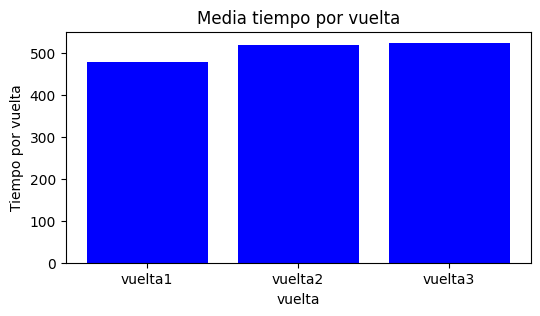

In [27]:
fig, ax=plt.subplots(figsize=(6,3))
plt.bar(vuelta,mean,color='blue')
plt.title("Media tiempo por vuelta")
plt.xlabel("vuelta")
plt.ylabel("Tiempo por vuelta")
plt.show()

Se agrega una columna con la suma de las 3 vueltas de acuerdo a la velocidad

In [28]:
df_interest1["SUMA"]=df_interest1.sum(axis=1)


Esta es la parte más importante ya que se calcula la anomalía en porcentaje %,es decir, es el resultado de la suma de tiempo de cada una de las vueltas restando la media estandar de la suma de tiempos de cada velocidad gestrada entre la media estandar general sobre 100, para obtener la el porcentaje de aceleración.

In [29]:
m_total=df_interest1["SUMA"].mean()
df_interest1["ANOMALIA"]=(((df_interest1["SUMA"]- m_total)/m_total)*100).apply(np.ceil)
df_interest1

,vuelta1,vuelta2,vuelta3,SUMA,ANOMALIA
speed,,,,,
0,6.634797,NaN,NaN,6.634797,-99.0
1,0.583953,NaN,NaN,0.583953,-99.0
2,1.251636,NaN,NaN,1.251636,-99.0
3,0.667403,NaN,NaN,0.667403,-99.0
4,0.684094,NaN,NaN,0.684094,-99.0
...,...,...,...,...,...
302,270.734722,232.052126,19.419575,522.206423,-57.0
303,324.585031,197.333723,NaN,521.918754,-57.0
304,454.566112,237.895972,NaN,692.462084,-43.0


Para este caso graficamos dichos porcentajes en cada una de las velocidades registradas durante el juego con la marca de la linea en color azul y la linea marcada en color naranja muestra el suavizado de la tendencia de la gráfica de acuerdo a la media estandar calculada, donde claramente se observan los picos que hubo excesos de aceleración a determinada potencia del motor donde figura el arranque del vehiculo en la carrera, las lineas rectas de la pista y la aproximacion a la llegada de la meta que es cuando se imprime mayor velocidad del vehiculo.

<ipython-input-30-a8209a0be037>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest1["MEDIA"] = df_interest1["ANOMALIA"].rolling(window=10).mean() + (1 * df_interest1["ANOMALIA"].rolling(window=10).std())


<Axes: xlabel='speed'>

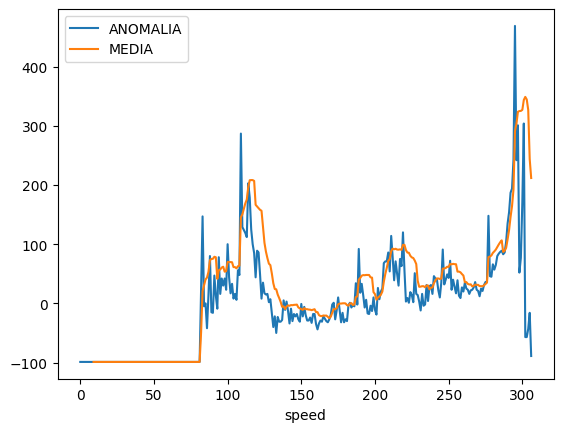

In [30]:
df_interest1=(df_interest1[["ANOMALIA"]])
df_interest1["MEDIA"] = df_interest1["ANOMALIA"].rolling(window=10).mean() + (1 * df_interest1["ANOMALIA"].rolling(window=10).std())
df_interest1.plot()

## Generar dataset de test y de training

In [31]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df_interest, test_size=0.33)

print(df_train.shape)
print(df_test.shape)


(6320, 53)
(3113, 53)


## Guardar información procesada y transformada en archivo
En este caso la información será guardada en un documento csv, de igual manera dada la naturaleza estructurada de la información, es perfectamente aplicable una base de datos SQL (MySQL, MariaDB, Postgres) incluso columnar (Cassandra) para poder almacenar multiples carreras, en este caso solo tenemos datos de una carrera, y por ello un archivo csv cubre las necesidades actuales.

In [32]:
#Guardando en archivo csv local
df_interest.to_csv('F1_2020_tel.csv', sep=',', index=False)

## Proceso de aprendizaje automatico
Dado que se tiene información tanto del estado del coche así como de su estado relativo a la vuelta, es posible analizar conductas de conducción, y su impacto en el tiempo de vuelta.      
En este caso se desea analizar los puntos de frenada para contestar la pregunta ¿Cuál es el punto óptimo de frenado en cada curva de cualquier pista de carreras?

### Uso de freno
Primero comencemos por analizar el uso de los frenos en cada vuelta:

In [33]:
plt.rcParams['figure.figsize'] = [9, 6]

laps = []

#Evaluamos cuantas vueltas se corrieron y segmentamos en una lista de python por cada vuelta
for lap in df_interest["currentLapNum"].unique():
  query = "currentLapNum == " + str(lap)
  laps.append(df_interest.query(query))


Podemos gráficar el uso del pedal de freno a través de cada una de las vueltas

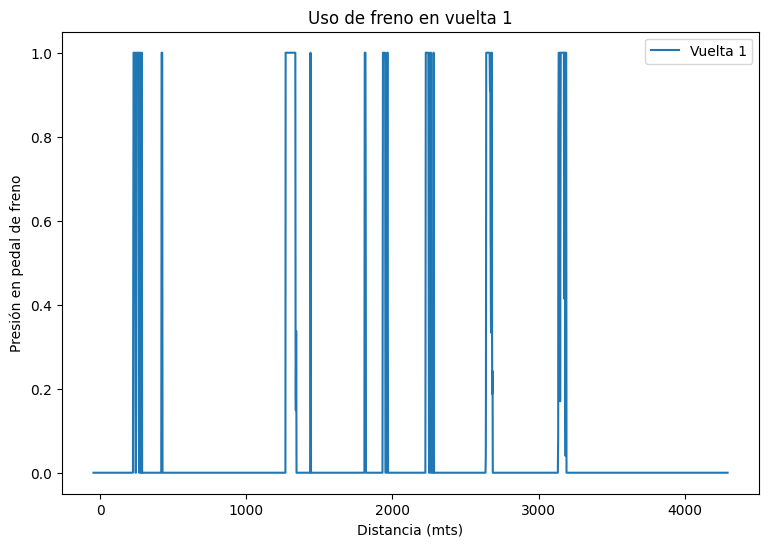

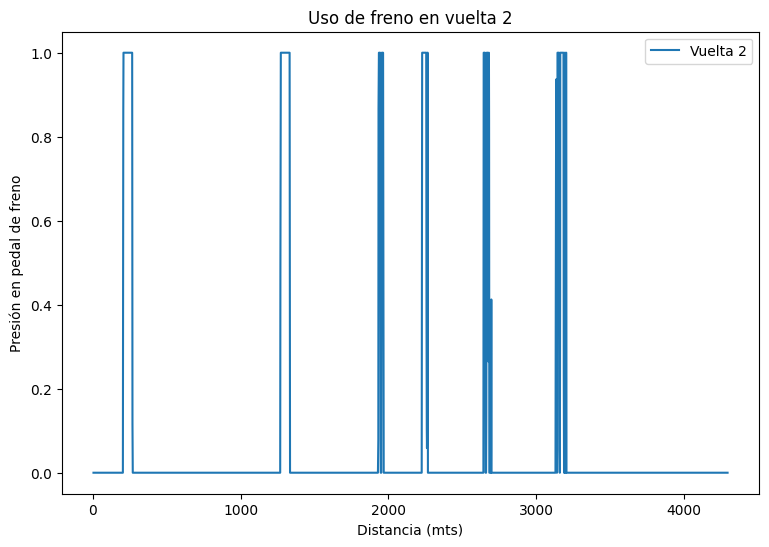

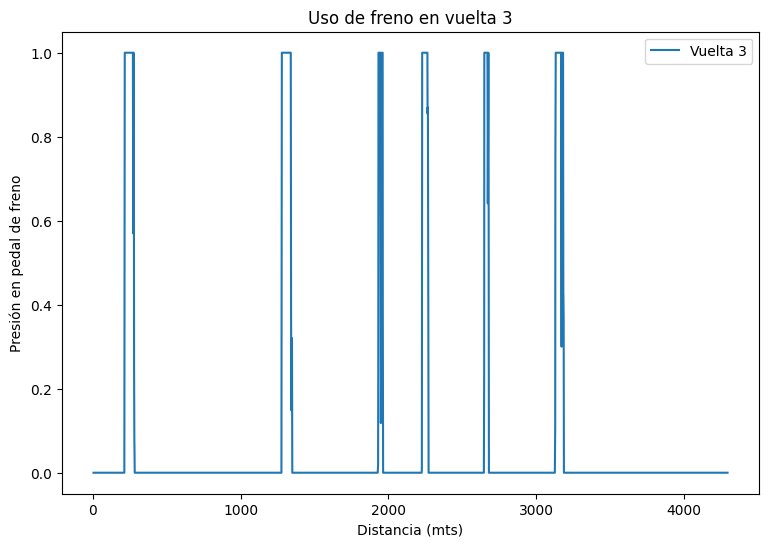

In [34]:
for lap in range(len(laps)):
  laps[lap].plot("lapDistance", "brake", ylabel="Presión en pedal de freno", xlabel="Distancia (mts)", label=f"Vuelta {lap+1}", title=f"Uso de freno en vuelta {lap+1}")

De las gráficas superiores podemos notar que las secciones en las que se aplica el pedal de freno son en su mayoría ciclicas, lo cuál hace sentido ya cada vuelta, reinicia la secuencia de curvas y puntos de freno

### Análisis de curvas

Muestreo de participantes que oprimieron el freno en la primer curva de la carrera en las 3 vueltas clasificadas por color azul vuelta 1, amarillo vuelta2 y verde vuelta 3, este grafico muestra una relacion freno desaceleracion, es decir mapea el punto exacto donde el jugador preciono el freno y que velocidad tenia en ese momento.

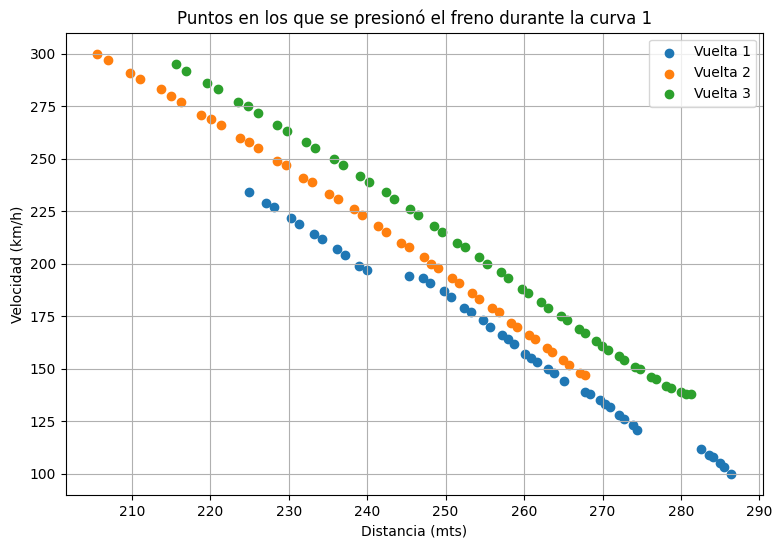

In [35]:
plt.scatter(laps[0].query("lapDistance < 350 and brake != 0")["lapDistance"], laps[0].query("lapDistance < 350 and brake != 0")["speed"], label="Vuelta 1")
plt.scatter(laps[1].query("lapDistance < 350 and brake != 0")["lapDistance"], laps[1].query("lapDistance < 350 and brake != 0")["speed"], label="Vuelta 2")
plt.scatter(laps[2].query("lapDistance < 350 and brake != 0")["lapDistance"], laps[2].query("lapDistance < 350 and brake != 0")["speed"], label="Vuelta 3")
plt.grid(True)
plt.legend(loc='best')
plt.title("Puntos en los que se presionó el freno durante la curva 1")
plt.xlabel("Distancia (mts)")
plt.ylabel("Velocidad (km/h)")
plt.show()


Deteccion de los detalles de las curvas en la carrera, como la trayectoria y apertura de la misma, en que kilometro inicia y cual termina la curva y el mapeo de los puntos donde los jugadores presionaron el freno.

In [36]:
import math
import matplotlib.pyplot as plt

df = pd.DataFrame(laps[0])

# Clasificar por rango de frenado vs desaceleracion
df['lap'] = ((df['brake'] > df['brake'].shift()) & (df['speed'] < df['speed'].shift())).cumsum()
df

# Filtrar y mostrar las lapDistance donde hay vueltas completas
vueltas_completas = df.groupby('lap')['lapDistance'].max()
#print(vueltas_completas)

def calcular_rango(vueltas_completas):
    groups_centenas = {}
    for value in vueltas_completas:
        group = math.floor(value / 100) * 100
        if group in groups_centenas:
            groups_centenas[group].append(value)
        else:
            groups_centenas[group] = [value]

    print("Frenado en curvas en Vuelta 1:")
    contador = 1
    for group, values in groups_centenas.items():
        rango = max(values) - min(values)
        print(f"Curva {contador}:(Trayectoria: {round(rango, 2)}) Ubicacion:{min(values)}-->{max(values)} {values}")
        contador += 1

    print()

calcular_rango(vueltas_completas)



Frenado en curvas en Vuelta 1:
Curva 1:(Trayectoria: 58.59) Ubicacion:223.892914-->282.486542 [223.892914, 224.975174, 244.469879, 245.378067, 247.167526, 248.052719, 266.429352, 267.738403, 268.383972, 269.657562, 282.486542]
Curva 2:(Trayectoria: 1.51) Ubicacion:417.635101-->419.146851 [417.635101, 419.146851]
Curva 3:(Trayectoria: 0.0) Ubicacion:1267.638672-->1267.638672 [1267.638672]
Curva 4:(Trayectoria: 1.87) Ubicacion:1338.729004-->1340.596436 [1338.729004, 1339.36377, 1340.596436]
Curva 5:(Trayectoria: 1.14) Ubicacion:1436.825195-->1437.96228 [1436.825195, 1437.395264, 1437.96228]
Curva 6:(Trayectoria: 0.0) Ubicacion:1808.167847-->1808.167847 [1808.167847]
Curva 7:(Trayectoria: 30.81) Ubicacion:1931.954102-->1962.760376 [1931.954102, 1934.162354, 1960.97583, 1962.760376]
Curva 8:(Trayectoria: 54.37) Ubicacion:2225.524658-->2279.892578 [2225.524658, 2226.487549, 2255.018311, 2256.326416, 2279.892578]
Curva 9:(Trayectoria: 47.33) Ubicacion:2637.160156-->2684.48999 [2637.160156, 2

### Clustering by density (DBSCAN)

Ahora si bien se logran detectar 11 curvas, muchas de ellas son en plena aceleración, y no representan puntos de freno. Si contrastamos con los puntos en los que se presionó el freno, se nota que existen menos "picos" comparados con la cantidad de curvas detectadas.

Text(0, 0.5, 'Presión en pedal de freno')

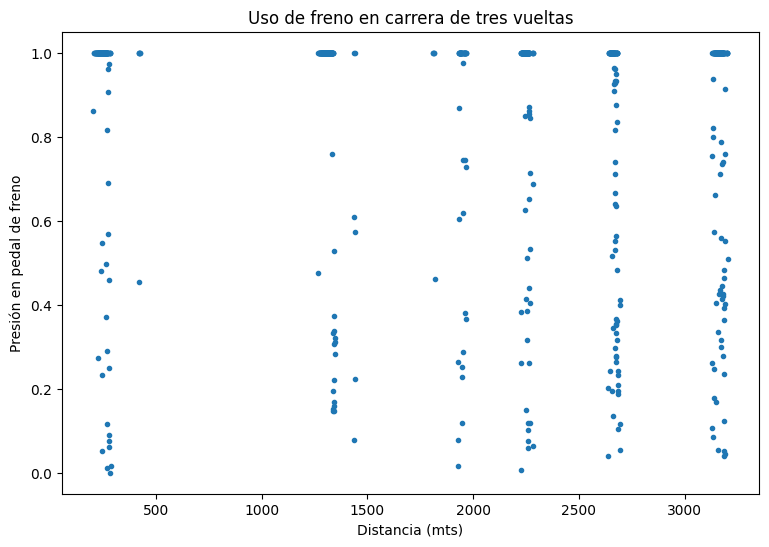

In [37]:
plt.scatter(df_interest.query("brake != 0")["lapDistance"], df_interest.query("brake != 0")["brake"], s=9)
plt.title("Uso de freno en carrera de tres vueltas")
plt.xlabel("Distancia (mts)")
plt.ylabel("Presión en pedal de freno")

Entonces se optó por emplear el algoritmo de agrupamiento DBSCAN (Density-Based Spatial Clustering of Applications with Noise). El cuál pertenece al aprendizaje no supervisado y fue elegido por ser robusto ante las anomalías.

In [38]:
from sklearn.cluster import KMeans

Compenzamos por preparar los datos a agrupar, queremos saber cuando se aplica el freno, y en que punto de la pista (distancia en metros a partir de la linea de meta)

In [39]:
brake_points = df_interest.query("brake != 0").loc[:,["lapDistance", "brake"]].values

Para los algoritmos de agrupamiento, es común realizar un análisis de cuál es la cantidad optima de grupos, para ello se emplea el algoritmo "elbow" el cuál el cual generan distintas cantidades de grupos y se mide el nivel de dispersión de sus puntos, entre menos grupos, más debe extenderse cada grupo.

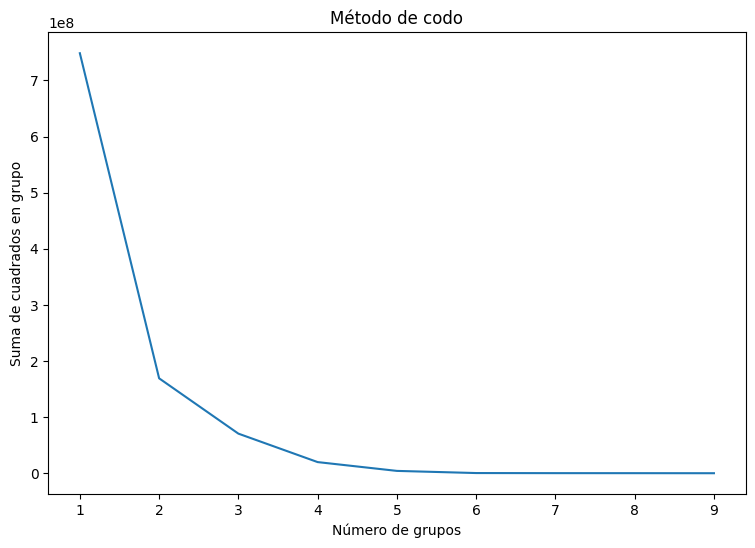

In [40]:
wcss = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i,
  init = 'k-means++', max_iter = 300, n_init = 3)
  kmeans.fit(brake_points)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title("Método de codo")
plt.xlabel("Número de grupos")
plt.ylabel("Suma de cuadrados en grupo")
plt.show()

Podemos notar que el número de grupos mejor balanceados es 4.

Ahora comenzamos a preparar el modelo de DBSCAN

In [41]:
from sklearn.cluster import DBSCAN

Epsilon y min_sample son los parametros que requiere el algoritmo DBSCAN, eps representa el alcance máximo del cluster (radio) y min_samples la cantidad mínima de puntos para que sea un grupo válido (esta restricción de puntos mínimos es la que permite detectar y aislar anomalías).

In [42]:
dbscan = DBSCAN(eps=10, min_samples=8)

In [43]:
# Ajustamos el modelo con los datos de frenada
brake_points_labels = dbscan.fit_predict(brake_points)

In [44]:
np.unique(brake_points_labels)

array([-1,  0,  1,  2,  3,  4,  5])

Obtenemos 7 grupos distintos, pero cabe resaltar que el grupo -1 es el que contiene y aisla todas las anomalias. Y en el contexto de esta investigación, aislar las anomalías es importante ya que, durante una carrera existen infinidad de eventos que pueden hacer que un piloto pise el freno en una zona que no es una zona de freno, si otro piloto cubre la posición de manera agresiva, una pinchadura de neumatico, banderas amarillas (reducir la velocidad por algun incidente en pista), etc.


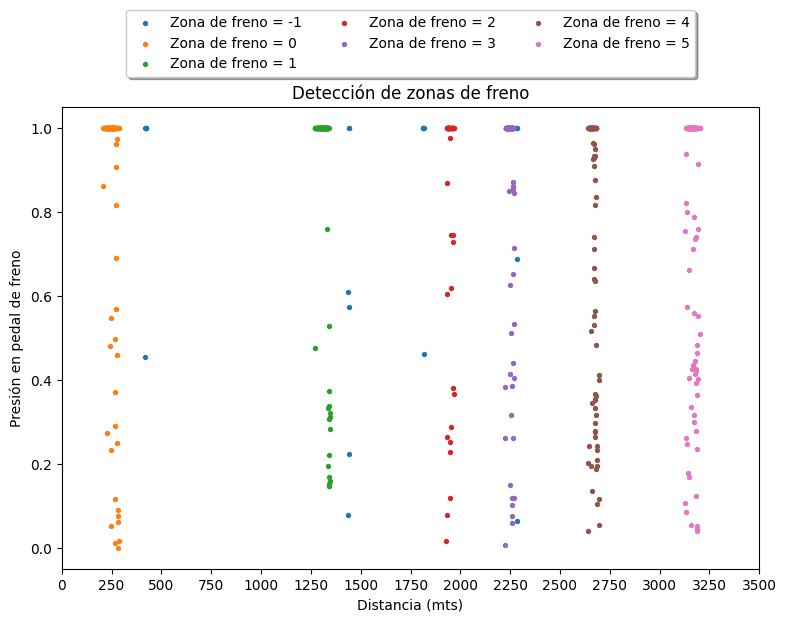

In [45]:
for label in np.unique(brake_points_labels):
  plt.scatter(brake_points[brake_points_labels== label, 0], brake_points[brake_points_labels == label,1], s=8, label='Zona de freno = {i}'.format(i=label))
  plt.title("Detección de zonas de freno")
  plt.xlabel("Distancia (mts)")
  plt.ylabel("Presión en pedal de freno")
  plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),  ncol=3, fancybox=True, shadow=True)
  plt.xticks(np.arange(round(brake_points[:, 0].min()-100, -10), round(brake_points[:, 0].max()+500, -1), 250))


Habiendo catalogado las zonas de freno en función de la distancia de la meta, podemos determinar exactamente los puntos de inicio y fin de cada zona de freno.

In [46]:
for label in range(0, brake_points_labels.max() +1):
  print(f"Zona de freno {label}: \n\tInicio: {brake_points[brake_points_labels == label, 0].min()} \tFin: {brake_points[brake_points_labels == label, 0].max()}")

Zona de freno 0: 
	Inicio: 205.615723 	Fin: 286.430115
Zona de freno 1: 
	Inicio: 1268.642578 	Fin: 1347.212891
Zona de freno 2: 
	Inicio: 1929.683594 	Fin: 1968.759888
Zona de freno 3: 
	Inicio: 2225.743164 	Fin: 2270.394531
Zona de freno 4: 
	Inicio: 2639.220215 	Fin: 2696.487793
Zona de freno 5: 
	Inicio: 3128.041016 	Fin: 3203.333984


Que si lo comparamos con las curvas detectadas, muchos rangos son parecidos, pero agrupamos y filtramos por zona de freno eliminando las curvas rápidas en las que no es necesario frenar.

Un dato relevante es que al conocer el inicio y fin de las zonas de freno, basados en la distancia respecto a la meta, podemos filtrar nuestro dataset completo en las distancias relevantes y explorar los datos para todas las vueltas en las zonas de freno.

In [47]:
query = f"lapDistance > {brake_points[brake_points_labels == 0, 0].min()} and lapDistance < {brake_points[brake_points_labels == 0, 0].max()}"

print(query)
df_interest.query(query)

lapDistance > 205.615723 and lapDistance < 286.430115


,sessionTime_x,frameIdentifier,lastLapTime,currentLapTime,sector1TimeInMS,sector2TimeInMS,bestLapTime,bestLapNum,bestLapSector1TimeInMS,bestLapSector2TimeInMS,...,tyresInnerTempFrontR,engineTemperature,tyresPressureRearL,tyresPressureRearR,tyresPressureFrontL,tyresPressureFrontR,surfaceTypeRearL,surfaceTypeRearR,surfaceTypeFrontL,surfaceTypeFrontR
573,14.147621,577,0.000000,7.707796,0,0,0.000000,0,0,0,...,89,93,21.349371,21.349632,22.827578,22.827465,Tarmac,Tarmac,Tarmac,Tarmac
574,14.164287,578,0.000000,7.724510,0,0,0.000000,0,0,0,...,89,93,21.349375,21.349636,22.827547,22.827435,Tarmac,Tarmac,Tarmac,Tarmac
575,14.197713,579,0.000000,7.757898,0,0,0.000000,0,0,0,...,89,93,21.349382,21.349644,22.827484,22.827374,Tarmac,Tarmac,Tarmac,Tarmac
576,14.214428,580,0.000000,7.774602,0,0,0.000000,0,0,0,...,89,93,21.349386,21.349646,22.827454,22.827343,Tarmac,Tarmac,Tarmac,Tarmac
577,14.247946,581,0.000000,7.807923,0,0,0.000000,0,0,0,...,89,93,21.349390,21.349653,22.827391,22.827280,Tarmac,Tarmac,Tarmac,Tarmac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,168.303879,6948,74.657433,3.787030,0,0,74.657433,2,18120,38181,...,93,124,21.509274,21.555622,22.968470,23.064005,Tarmac,Tarmac,Tarmac,Tarmac
6862,168.320526,6949,74.657433,3.803781,0,0,74.657433,2,18120,38181,...,93,124,21.509270,21.555622,22.968500,23.064016,Tarmac,Tarmac,Tarmac,Tarmac
6863,168.353790,6950,74.657433,3.837028,0,0,74.657433,2,18120,38181,...,93,124,21.509262,21.555628,22.968563,23.064041,Tarmac,Tarmac,Tarmac,Tarmac
6864,168.370514,6951,74.657433,3.853695,0,0,74.657433,2,18120,38181,...,93,124,21.509260,21.555630,22.968594,23.064054,Tarmac,Tarmac,Tarmac,Tarmac


Por ejemplo podemos ahora gráficar la velocidad del coche en la zona de freno 1 en cada una de las vueltas.

Text(0, 0.5, 'Velocidad (km/h)')

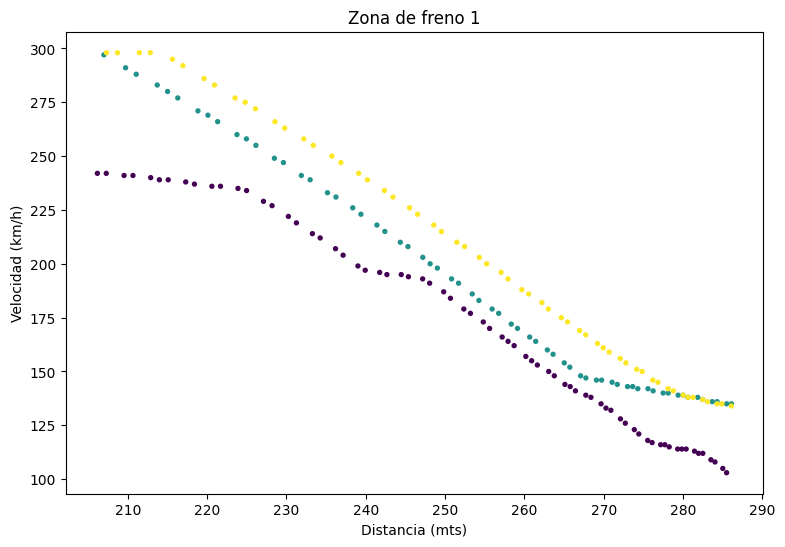

In [48]:
plt.scatter(df_interest.query(query)["lapDistance"], df_interest.query(query)["speed"],
            c=df_interest.query(query)["currentLapNum"],
            s=8)
plt.title("Zona de freno 1")
plt.xlabel("Distancia (mts)")
plt.ylabel("Velocidad (km/h)")


Y al tener todas las zonas de freno bien definidas, podemos hacer el mismo análisis para todas, incluso, podemos hacer una regresión líneal para predecir si se llega a una zona de frenada a mayor o menor velocidad, cuantos metros antes o después es necesario aplicar el freno para alcanzar la misma velocidad final al final de la zona de freno.

In [49]:
from sklearn.linear_model import LinearRegression

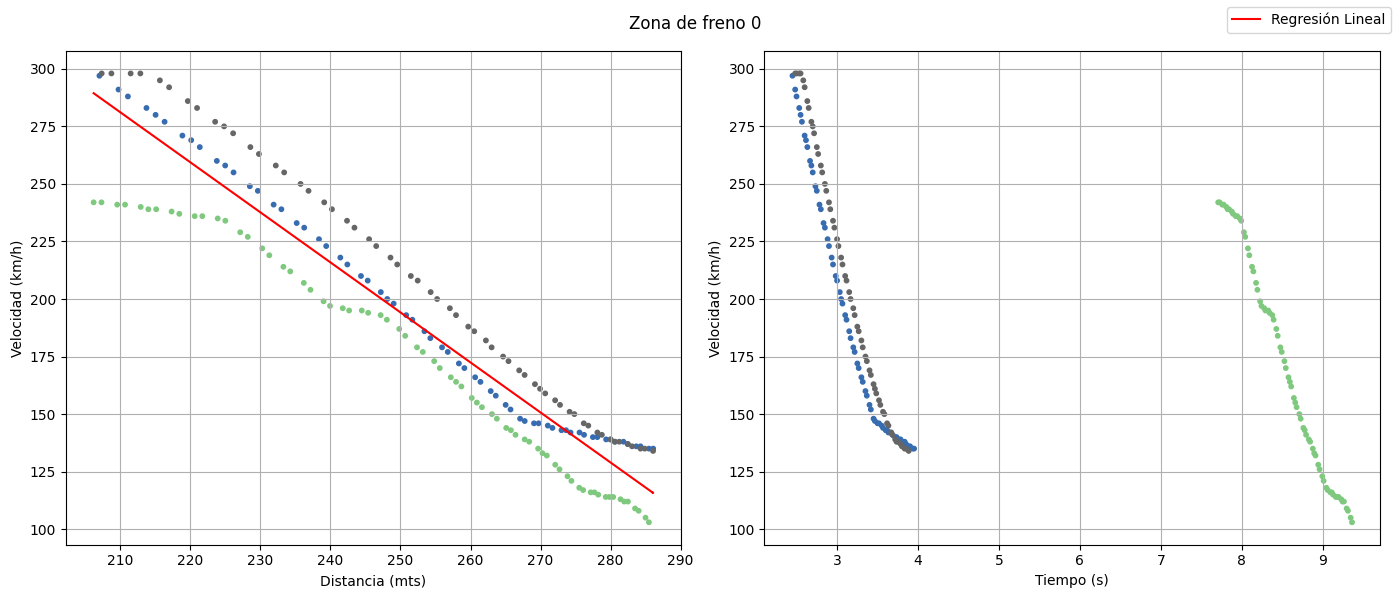

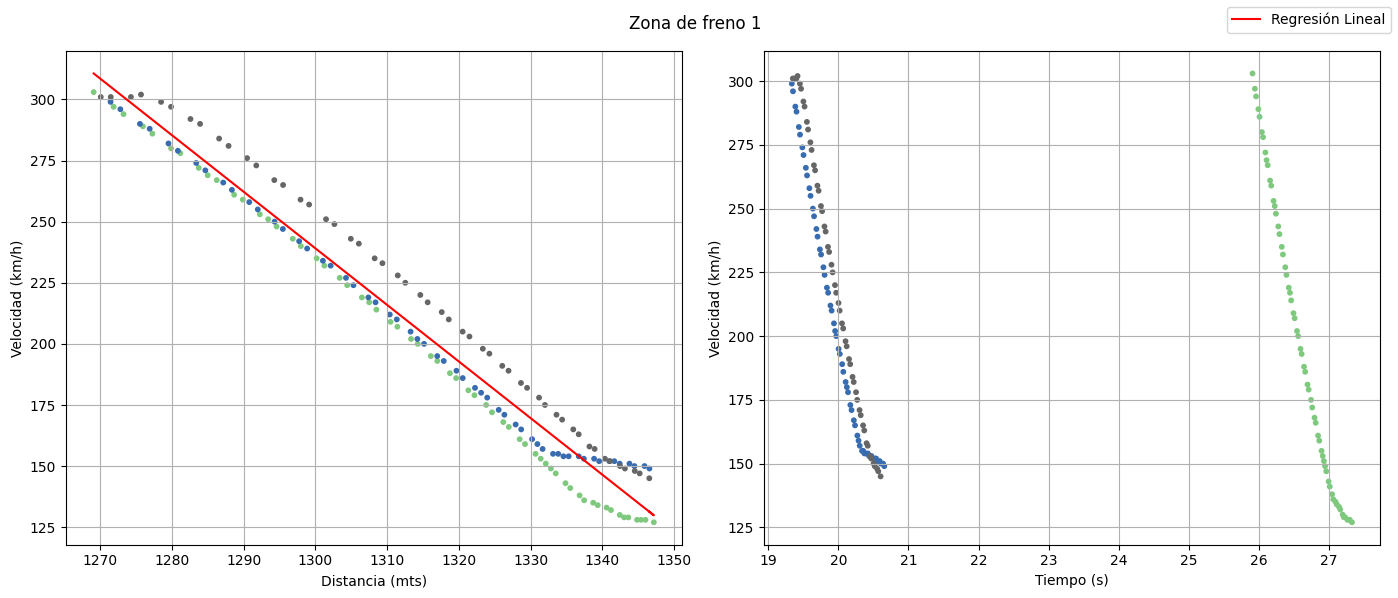

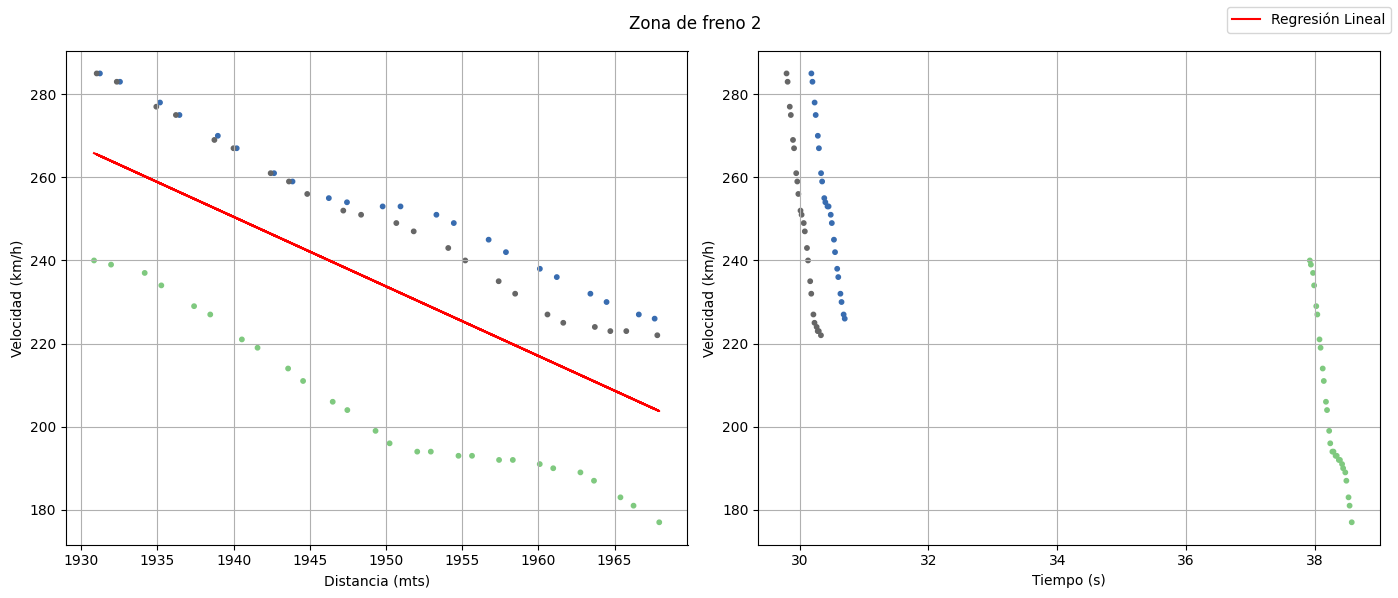

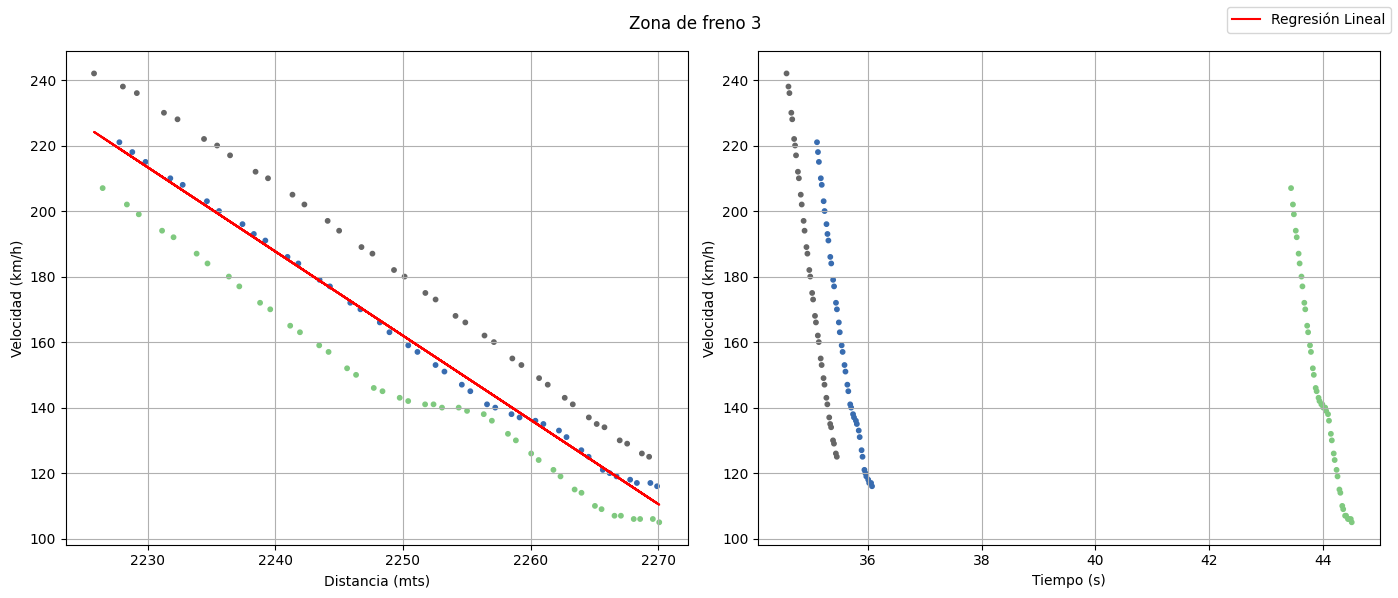

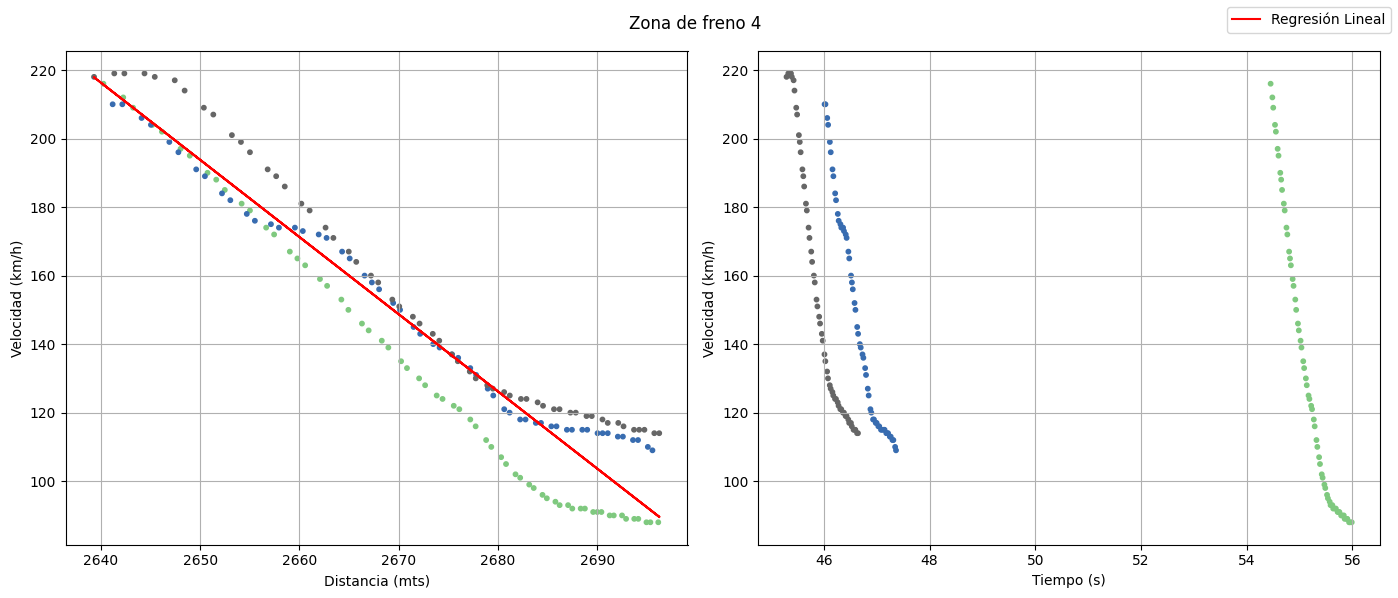

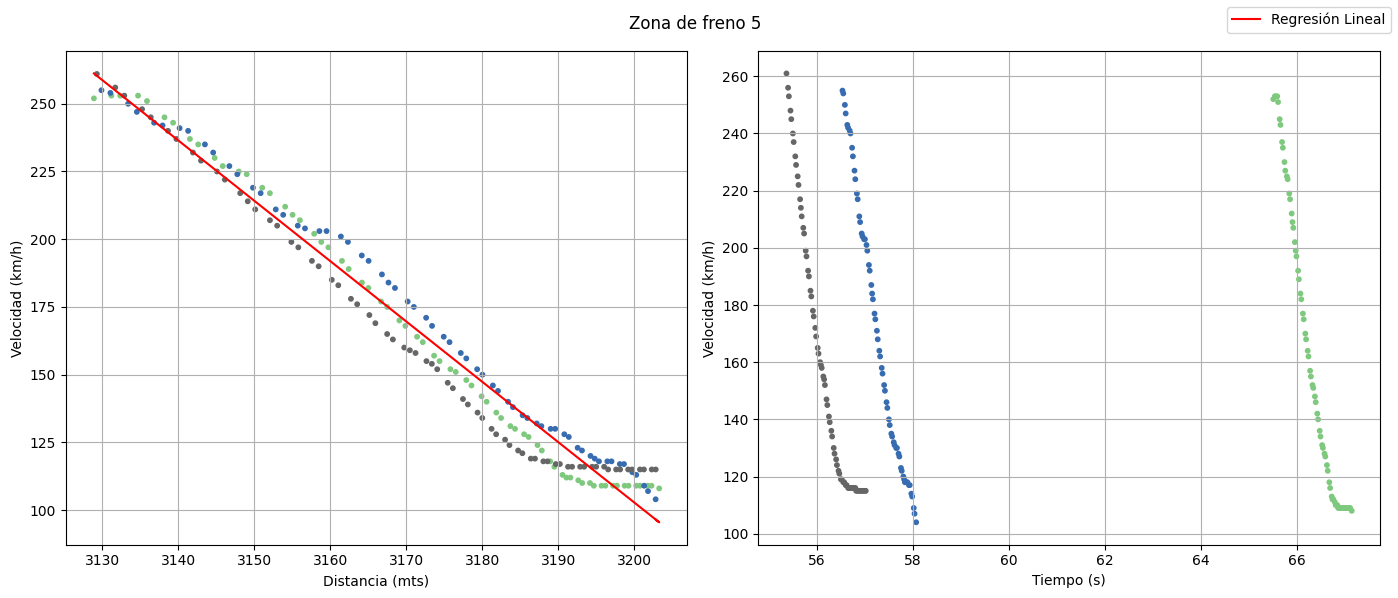

In [50]:
def CalcLinearReg(x, y):
  reg = LinearRegression().fit(x,y)
  y_pred = reg.predict(x)
  return y_pred

for label in range(0, brake_points_labels.max() +1):
  query = f"lapDistance > {brake_points[brake_points_labels == label, 0].min()} and lapDistance < {brake_points[brake_points_labels == label, 0].max()}"

  #Linear regresion
  x=df_interest.query(query)["lapDistance"].values.reshape(-1,1)
  y=df_interest.query(query)["speed"]

  y_pred = CalcLinearReg(x, y)

  #Linear regresion

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
  axes[0].scatter(df_interest.query(query)["lapDistance"], df_interest.query(query)["speed"],
            c=df_interest.query(query)["currentLapNum"],
            s=10,
            cmap="Accent")
  axes[1].scatter(df_interest.query(query)["currentLapTime"], df_interest.query(query)["speed"],
            c=df_interest.query(query)["currentLapNum"],
            s=10,
            cmap="Accent")
  axes[0].plot(x, y_pred, c="r", label=f"Regresión Lineal")
  fig.suptitle(f"Zona de freno {label}")
  axes[0].set_xlabel("Distancia (mts)")
  axes[0].set_ylabel("Velocidad (km/h)")
  axes[1].set_xlabel("Tiempo (s)")
  axes[1].set_ylabel("Velocidad (km/h)")
  axes[0].grid(True)
  axes[1].grid(True)
  fig.tight_layout()
  fig.legend()
  fig.show()

## Conclusiones
Mediante este proyecto se exploró cómo, mediante el análisis de datos de telemetría de un coche, es posible detectar las tendencias de manejo y es más sencillo para el piloto entender porqué es lento y que debe hacer para mejorar, incluso puede ser un buen indicador de consistencia, que tanta varianza tienen sus puntos de frenada, o para analizar el rendimiento de componentes propios del coche como vida útil de frenos, reparto de frenada, distribución de pesos y desgaste de neumáticos, etc.